In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [2]:
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


### Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.

In [5]:
group_by_1 = df.groupby(["country"])
group_by_1_count = group_by_1.count()
group_by_1_count.reset_index()
group_by_1_count.head()

,lat,lon,city
country,,,
Albania,29,29,29
Bosnia and Herzegovina,26,26,26
Croatia,30,30,30
Czech Republic,130,130,130
Germany,225,225,225


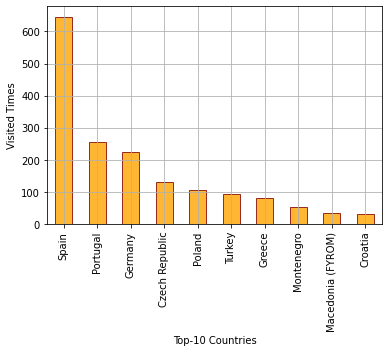

In [6]:
group_by_1_count_top10 = group_by_1_count.sort_values('lat',ascending = False).head(10)
group_by_1_count_top10.plot.bar(y='lat',xlabel='Top-10 Countries', ylabel='Visited Times', 
                                legend=None, grid=True, alpha=0.8, color='orange' ,edgecolor='maroon')
plt.show()

### Q2: Draw the same bar chart, but now for the most visited cities instead of countries

In [7]:
group_by_2 = df.groupby("city")
group_by_2_count = group_by_2.count()
group_by_2_count.reset_index()
group_by_2_count.head()

,lat,lon,country
city,,,
Algueirão-Mem Martins,1,1,1
Alpirsbach,1,1,1
Amadora,1,1,1
Ansbach,1,1,1
Athens,67,67,67


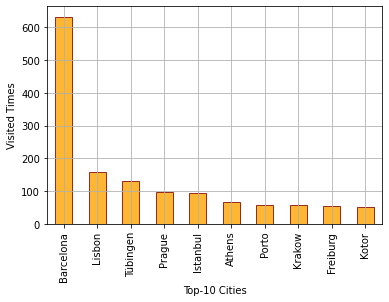

In [8]:
group_by_2_count_top10 = group_by_2_count.sort_values('lat',ascending = False).head(10)
group_by_2_count_top10.plot.bar(y='lat', xlabel='Top-10 Cities', ylabel='Visited Times', 
                                legend=None, grid=True, alpha=0.8, color='orange' ,edgecolor='maroon')
plt.show()

### Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 

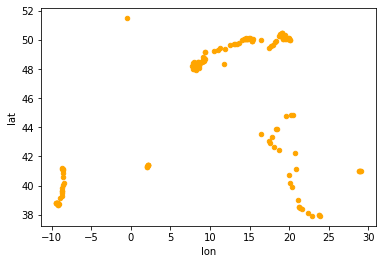

In [9]:
rs.plot.scatter(x='lon', y='lat', color='orange')
plt.show()

### Q4: Draw a  matplotlib and seaborn line chart from countdata.

In [10]:
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

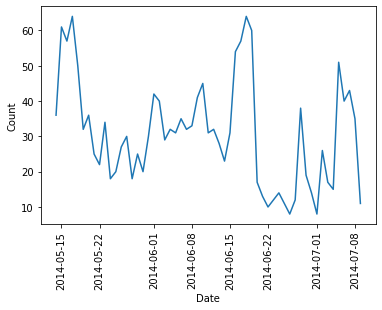

In [11]:
countdata.plot.line(rot=90, xlabel='Date', ylabel='Count')
plt.show()

### Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 

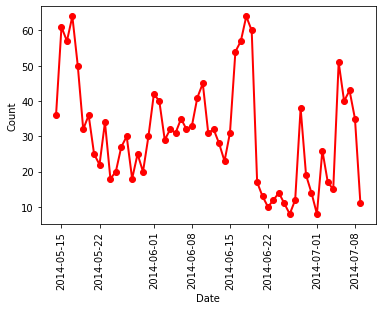

In [12]:
countdata.plot.line(rot=90, xlabel='Date', ylabel='Count', 
                    linewidth=2, color='red', marker='o')
plt.show()

### Q6: draw a pie chart for cities.

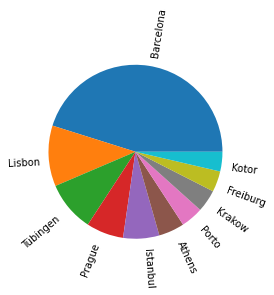

In [13]:
group_by_2_count_top10.plot.pie(y='lat', ylabel='', legend=None, rotatelabels=True)
plt.show()

### Q7: Can you draw a map based on the latitude and lognitude of the cities? 

In [14]:
import folium
city_map = folium.Map(location=[47, 8], zoom_start=4)

for lat,lon,city in zip(df.lat, df.lon, df.city):
    folium.Marker(
        location=[lat,lon],
        popup = city,
    ).add_to(city_map)
    
display(city_map)